In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Define the hyperparameters
vocab_size = 10000
embedding_dim = 16
max_length = 50
num_units = 64

# Define the input descriptions for each trait
openness_desc = "Openness involves being receptive to new ideas, experiences, and perspectives. People who score high in openness tend to be creative, imaginative, and curious."
conscientiousness_desc = "Conscientiousness involves being organized, responsible, and dependable. People who score high in conscientiousness tend to be efficient, reliable, and goal-oriented."
extraversion_desc = "Extraversion involves being outgoing, sociable, and assertive. People who score high in extraversion tend to be energetic, talkative, and enthusiastic."
agreeableness_desc = "Agreeableness involves being compassionate, cooperative, and empathetic. People who score high in agreeableness tend to be kind, caring, and considerate. They value harmony and are willing to compromise their own interests for the sake of others. They are often described as warm, friendly, and easy to get along with."
neuroticism_desc = "Neuroticism involves being prone to negative emotions such as anxiety, worry, and anger. People who score high in neuroticism tend to be sensitive, emotional, and reactive. They may experience mood swings and find it difficult to manage stress."

# Combine the input descriptions into a list
input_descs = [openness_desc, conscientiousness_desc, extraversion_desc, agreeableness_desc, neuroticism_desc]

# Tokenize the input descriptions
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(input_descs)
sequences = tokenizer.texts_to_sequences(input_descs)
padded_sequences = pad_sequences(sequences, maxlen=max_length, truncating='post')

# Define the LSTM model for generating prompt descriptions
prompt_model = Sequential()
prompt_model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
prompt_model.add(LSTM(num_units))
prompt_model.add(Dense(max_length, activation='linear'))

# Compile the prompt model
prompt_model.compile(optimizer='adam', loss='mse')

# Train the prompt model on the preprocessed data
X_train = padded_sequences
y_train = padded_sequences
prompt_model.fit(X_train, y_train, epochs=50)

# Generate a prompt description for each trait
for i, trait_desc in enumerate(input_descs):
    prompt_sequence = pad_sequences(tokenizer.texts_to_sequences([trait_desc]), maxlen=max_length, truncating='post')
    pred = prompt_model.predict(prompt_sequence)[0]
    pred_desc = tokenizer.sequences_to_texts([pred])[0]
    print("Prompt description for {}: {}".format(trait_desc[:trait_desc.index(".")], pred_desc))

Epoch 1/50
1/1 [==============================] - 3s 3s/step - loss: 883.1688
Epoch 2/50
1/1 [==============================] - 0s 42ms/step - loss: 883.0590
Epoch 3/50
1/1 [==============================] - 0s 43ms/step - loss: 882.9447
Epoch 4/50
1/1 [==============================] - 0s 35ms/step - loss: 882.8188
Epoch 5/50
1/1 [==============================] - 0s 34ms/step - loss: 882.6751
Epoch 6/50
1/1 [==============================] - 0s 35ms/step - loss: 882.5065
Epoch 7/50
1/1 [==============================] - 0s 38ms/step - loss: 882.3027
Epoch 8/50
1/1 [==============================] - 0s 36ms/step - loss: 882.0500
Epoch 9/50
1/1 [==============================] - 0s 42ms/step - loss: 881.7259
Epoch 10/50
1/1 [==============================] - 0s 37ms/step - loss: 881.2941
Epoch 11/50
1/1 [==============================] - 0s 36ms/step - loss: 880.6934
Epoch 12/50
1/1 [==============================] - 0s 38ms/step - loss: 879.8135
Epoch 13/50
1/1 [======================

In [ ]:
import gensim.downloader as api

# Load the pre-trained Word2Vec model
model = api.load("word2vec-google-news-300")

# Define a function to generate similar words to a given word
def generate_similar_words(word, num_similar=5):
    try:
        similar_words = model.similar_by_word(word, topn=num_similar)
        print("Similar words to {}: ".format(word))
        for i, (word, similarity) in enumerate(similar_words):
            print("{}. {} ({:.2f})".format(i+1, word, similarity))
    except KeyError:
        print("Word not found in vocabulary.")

# Generate similar words to "compassionate"
generate_similar_words("compassionate")

# Generate similar words to "cooperative"
generate_similar_words("cooperative")

# Generate similar words to "empathetic"
generate_similar_words("empathetic")

[==================================================] 100.0% 1662.8/1662.8MB downloaded
Similar words to compassionate: 
1. caring (0.67)
2. caring_compassionate (0.67)
3. compassion (0.67)
4. really_hateful_lemmings (0.64)
5. empathetic (0.63)
Similar words to cooperative: 
1. co_operative (0.74)
2. Boasting_wrought_iron (0.65)
3. HVTN_funded (0.64)
4. cooperatives (0.57)
5. Cooperative (0.56)
Similar words to empathetic: 
1. empathic (0.71)
2. empathy (0.63)
3. compassionate (0.63)
4. sympathetic (0.62)
5. perceptive (0.57)


In [3]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Genism word2vec

code ref https://www.askpython.com/python-modules/gensim-word2vec


In [2]:
import gensim
import gensim.downloader

for model_name in list(gensim.downloader.info()['models'].keys()):
  print(model_name)

fasttext-wiki-news-subwords-300
conceptnet-numberbatch-17-06-300
word2vec-ruscorpora-300
word2vec-google-news-300
glove-wiki-gigaword-50
glove-wiki-gigaword-100
glove-wiki-gigaword-200
glove-wiki-gigaword-300
glove-twitter-25
glove-twitter-50
glove-twitter-100
glove-twitter-200
__testing_word2vec-matrix-synopsis


In [2]:
import gensim
import gensim.downloader

google_news_vectors = gensim.downloader.load('word2vec-google-news-300')


[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [12]:
# Finding words similar to Extroversion
print("5 similar words to sociability:")
words = google_news_vectors.most_similar("sociability", topn=5)
for word in words:
  print(word)
print()


5 similar words to sociability:
('connectedness', 0.61564701795578)
('sociality', 0.5651959180831909)
('conviviality', 0.5570436120033264)
('mental_stimulation', 0.5436522960662842)
('extroversion', 0.5430378913879395)



In [1]:
# Finding words similar to Aggreableness
print(" similar words to :")
words = google_news_vectors.most_similar("kindness", topn=5)
for word in words:
  print(word)
print()

 similar words to :


NameError: ignored

In [14]:
# Finding words similar to open to experience
print("5 similar words to creativity:")
words = google_news_vectors.most_similar("creativity", topn=5)
for word in words:
  print(word)
print()

5 similar words to creativity:
('creativeness', 0.723564088344574)
('creative', 0.7166152000427246)
('inventiveness', 0.6742721199989319)
('boundless_creativity', 0.6639965772628784)
('Creativity', 0.6453387141227722)



In [15]:
# Finding words similar to conscientiousness
print("5 similar words to thoughtfulness:")
words = google_news_vectors.most_similar("thoughtfulness", topn=5)
for word in words:
  print(word)
print()

5 similar words to thoughtfulness:
('Thoughtfulness', 0.589410662651062)
('graciousness', 0.5888411998748779)
('compassion', 0.5862864851951599)
('humility', 0.5822479128837585)
('kindness', 0.5728354454040527)



In [17]:
# Finding words similar to neuroticism
print("5 similar words to sadness:")
words = google_news_vectors.most_similar("sadness", topn=5)
for word in words:
  print(word)
print()

5 similar words to sadness:
('sorrow', 0.8653062582015991)
('grief', 0.7104111313819885)
('profound_sadness', 0.6925923824310303)
('anguish', 0.6861850619316101)
('saddness', 0.6407451033592224)



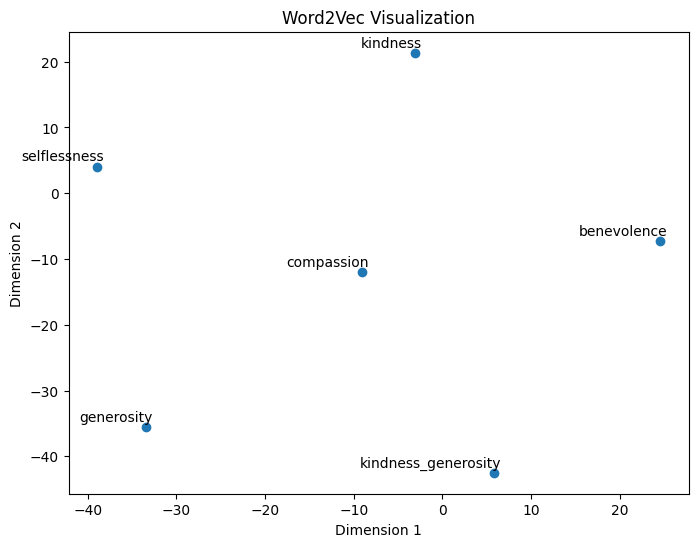

In [10]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Getting the word vectors for visualization
words_for_visualization = ["kindness"] + [word[0] for word in words]

word_vectors = []
for word in words_for_visualization:
    word_vectors.append(google_news_vectors[word])

# Convert the word vectors to a numpy array
word_vectors_array = np.array(word_vectors)

# Dimensionality reduction with t-SNE
tsne = TSNE(n_components=2, perplexity=5, random_state=42)  # Adjust the perplexity value
word_vectors_tsne = tsne.fit_transform(word_vectors_array)

# Plotting the word vectors
plt.figure(figsize=(8, 6))
plt.scatter(word_vectors_tsne[:, 0], word_vectors_tsne[:, 1], marker='o')

for i, word in enumerate(words_for_visualization):
    plt.annotate(word, xy=(word_vectors_tsne[i, 0], word_vectors_tsne[i, 1]),
                 xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')

plt.title("Word2Vec Visualization")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

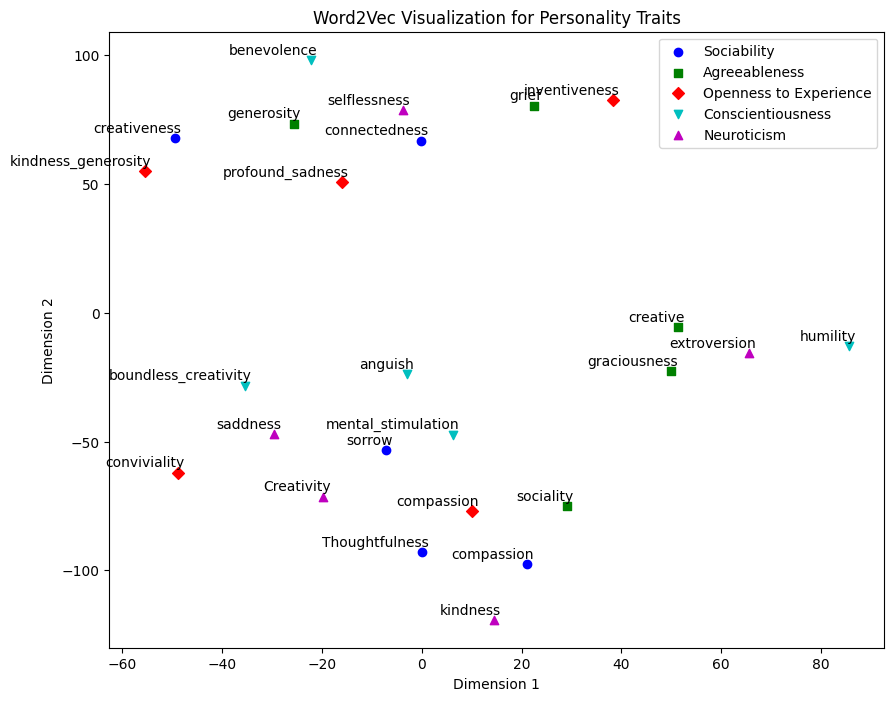

In [13]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Define the personality traits and their related words
personality_traits = {
    "Sociability": "sociability",
    "Agreeableness": "kindness",
    "Openness to Experience": "creativity",
    "Conscientiousness": "thoughtfulness",
    "Neuroticism": "sadness"
}

# Get the word vectors for visualization
words_for_visualization = []
for trait, word in personality_traits.items():
    similar_words = google_news_vectors.most_similar(word, topn=5)
    words_for_visualization.extend([(trait, word[0], word[1]) for word in similar_words])

# Convert the word vectors to a numpy array
word_vectors = np.array([google_news_vectors[word[1]] for word in words_for_visualization])

# Subset the word vectors for t-SNE
subset_size = 1000  # Adjust this value according to your dataset size
np.random.shuffle(word_vectors)
word_vectors_subset = word_vectors[:subset_size]

# Dimensionality reduction with t-SNE
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
word_vectors_tsne = tsne.fit_transform(word_vectors_subset)

# Plotting the word vectors
plt.figure(figsize=(10, 8))
colors = ['b', 'g', 'r', 'c', 'm']
markers = ['o', 's', 'D', 'v', '^']

for i, (trait, word, _) in enumerate(words_for_visualization):
    plt.scatter(word_vectors_tsne[i, 0], word_vectors_tsne[i, 1],
                color=colors[i % len(colors)], marker=markers[i % len(markers)])
    plt.annotate(word, xy=(word_vectors_tsne[i, 0], word_vectors_tsne[i, 1]),
                 xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')

plt.title("Word2Vec Visualization for Personality Traits")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend(personality_traits.keys())
plt.show()

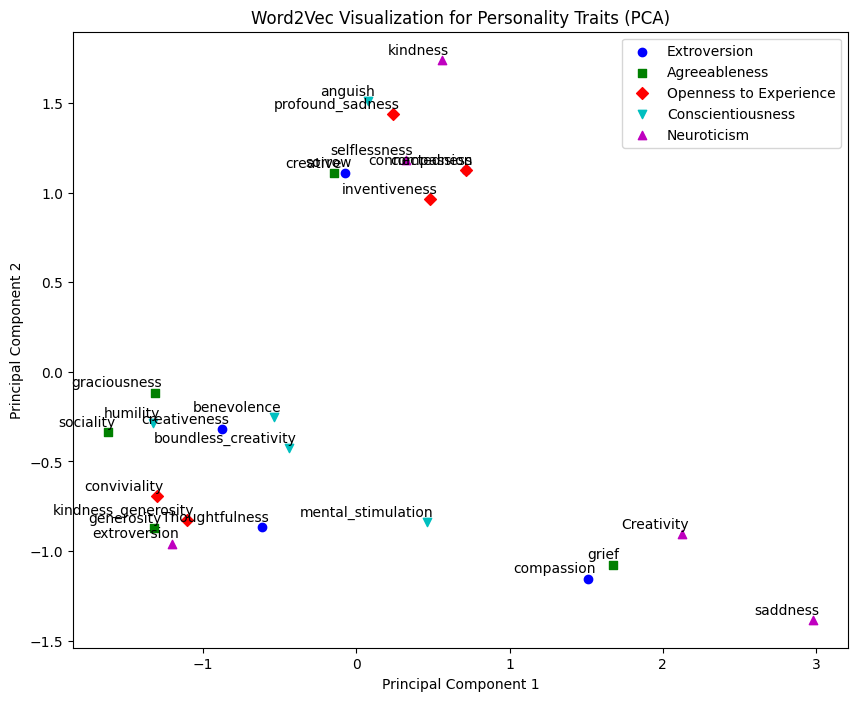

In [15]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Define the personality traits and their related words
personality_traits = {
    "Extroversion": "sociability",
    "Agreeableness": "kindness",
    "Openness to Experience": "creativity",
    "Conscientiousness": "thoughtfulness",
    "Neuroticism": "sadness"
}

# Get the word vectors for visualization
words_for_visualization = []
for trait, word in personality_traits.items():
    similar_words = google_news_vectors.most_similar(word, topn=5)
    words_for_visualization.extend([(trait, word[0], word[1]) for word in similar_words])

# Convert the word vectors to a numpy array
word_vectors = np.array([google_news_vectors[word[1]] for word in words_for_visualization])

# Subset the word vectors for PCA
subset_size = 1000  # Adjust this value according to your dataset size
np.random.shuffle(word_vectors)
word_vectors_subset = word_vectors[:subset_size]

# Dimensionality reduction with PCA
pca = PCA(n_components=2, random_state=42)
word_vectors_pca = pca.fit_transform(word_vectors_subset)

# Plotting the word vectors
plt.figure(figsize=(10, 8))
colors = ['b', 'g', 'r', 'c', 'm']
markers = ['o', 's', 'D', 'v', '^']

for i, (trait, word, _) in enumerate(words_for_visualization):
    plt.scatter(word_vectors_pca[i, 0], word_vectors_pca[i, 1],
                color=colors[i % len(colors)], marker=markers[i % len(markers)])
    plt.annotate(word, xy=(word_vectors_pca[i, 0], word_vectors_pca[i, 1]),
                 xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')

plt.title("Word2Vec Visualization for Personality Traits (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(personality_traits.keys())
plt.show()